#Sentiment Analysis with Python


In [1]:
#Loading the data to the variable as DataFrame
#importing pandas library
import pandas as pd
#import counter vectorized function from sklearn
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [2]:
#finding the positive and negative text in Data
pos=data[data['label']==1]
neg=data[data['label']==0]
print("Positive text \n",pos.head())
print("\nNegative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1

Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Text(0.5, 1.0, 'Positive vs Negative')

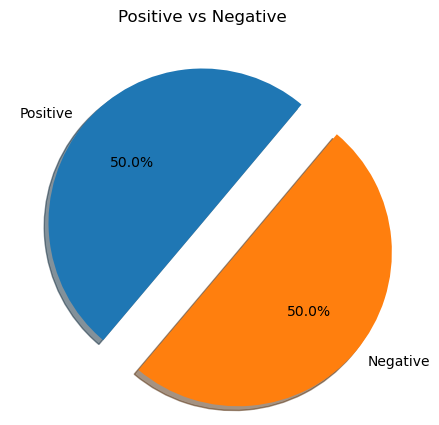

In [3]:
#Plotting the Postive vs Negative in piechart.
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
temp=[pos['label'].count(),neg['label'].count()]
plt.pie(temp,labels=["Positive","Negative"],autopct ='%2.1f%%',shadow = True,startangle = 50,explode=(0, 0.3))
plt.title('Positive vs Negative')

In [4]:
#importing re library 
import re
#Defining preprocessing function to process the data
def preprocess(text):
        text=re.sub('<[^>]*>','',text)
        emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
        text=re.sub('[\W]+',' ',text.lower()) +' '.join(emoji).replace('-','')
        return text   

In [5]:
#Applying the function preprocess on the data
data['text']=data['text'].apply(preprocess)

In [6]:
#Displaying the dataframe after applying the preprocessing.
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [7]:
#Defining a function called tokenizer which splits the sentence
def tokenizer(text):
        return text.split()
tokenizer("He was joyful as he was working in good environment")

['He',
 'was',
 'joyful',
 'as',
 'he',
 'was',
 'working',
 'in',
 'good',
 'environment']

In [8]:
#Importing stemmer function from NLTK library
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
#Defining function for Tokenizer porter
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [10]:
#Importing NLTK library.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
#Importing Word cloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#getting positive and negative data
positive_data = data[ data['label'] == 1]
positive_data = positive_data['text']
negative_data = data[data['label'] == 0]
negative_data= negative_data['text']

In [12]:
#Defining the function to plot the data in wordcloud
def plot_wordcloud(data, color = 'white'):
    words = ' '.join(data)
    clean_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stop,background_color=color,width=2500,height=2000).generate(clean_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


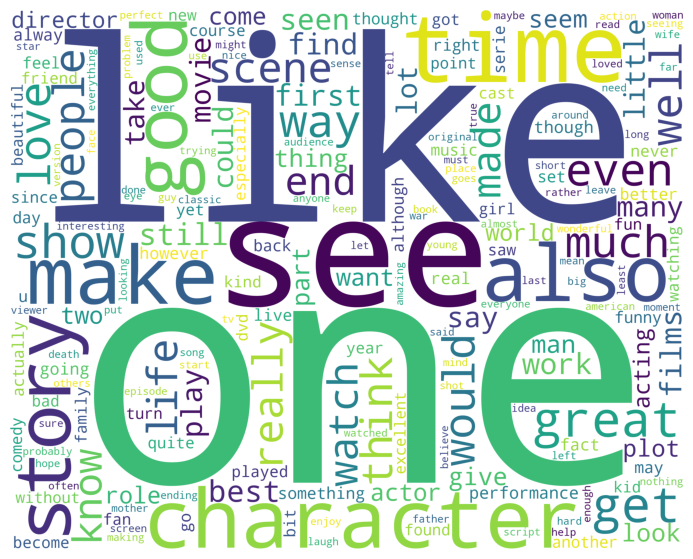

In [13]:
#Printing the positive data in wordcloud
print("Positive words")
plot_wordcloud(positive_data,'white')

Negative words


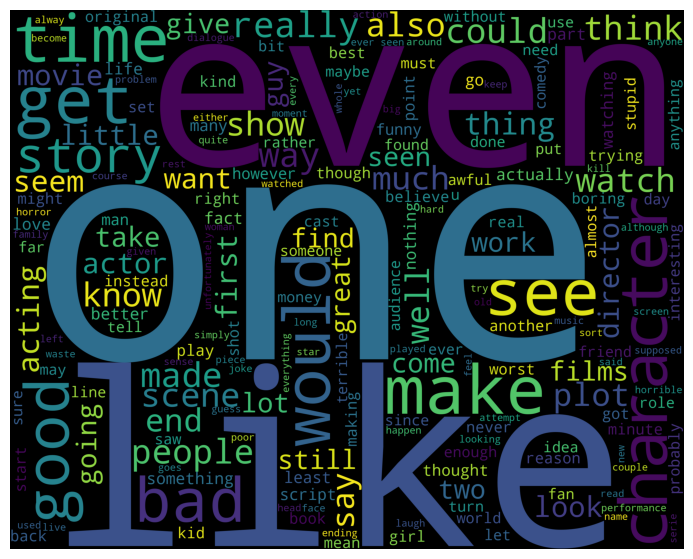

In [14]:
#Printing the negative data in wordcloud
print("Negative words")
plot_wordcloud(negative_data,'black')

In [15]:
#importing tfiVectorizer from sklearn for feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(strip_accents=None,preprocessor=None,lowercase=False,use_idf=True,norm='l2',tokenizer=tokenizer_porter,smooth_idf=True)
y=data.label.values
#scaling the data
x=tfid.fit_transform(data.text)

c:\Users\ok\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:

#splitting the train and test split using train_test_split function of sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [17]:
#Importing Logisitic RegressionCV from sklearn library
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   56.3s remaining:   56.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   57.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   57.4s finished


In [18]:
#Importing metrics from sklesrn to calculate accuracy
from sklearn import metrics
# Accuracy of our built model
print("Accuracy of our model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of our model: 0.89045


In [19]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Keep this for evaluation

# Assuming X_train, X_test, y_train, y_test are already defined from your train_test_split

# Initialize the RandomForestClassifier model
# You can tune these parameters for better performance
# n_estimators: The number of trees in the forest. Higher generally means better performance but slower training.
# random_state: For reproducibility.
# n_jobs: Number of CPU cores to use. -1 means use all available.
# max_depth: The maximum depth of the tree. Avoids overfitting by limiting tree complexity.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Train the model
print("Training RandomForestClassifier...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy of our RandomForestClassifier model:", accuracy_score(y_test, y_pred_rf))

Training RandomForestClassifier...
Training complete.
Accuracy of our RandomForestClassifier model: 0.81825


In [ ]:
# ... (Previous code remains the same up to data splitting) ...

# 6. Splitting Data (This section is already in your code)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

# 7. Implementing SVC (Replaces the LogisticRegressionCV section)
# Import SVC from sklearn.svm
from sklearn.svm import SVC
# Import GridSearchCV for hyperparameter tuning (optional but recommended for SVC)
from sklearn.model_selection import GridSearchCV
# Import metrics for classification report and confusion matrix (optional but good for detailed evaluation)
from sklearn import metrics
import numpy as np # Often useful for array operations, especially with sparse matrices

# Initialize the SVC classifier
# A linear kernel is often good for TF-IDF data due to high dimensionality
# You can experiment with other kernels like 'rbf' later, but they might be slower.
# Set probability=True if you need probability estimates (slower)
svc_classifier = SVC(kernel='linear', random_state=0, verbose=True)

# (Optional) Hyperparameter tuning with GridSearchCV
# Define a parameter grid to search for the best C value
# You can add 'gamma' if using 'rbf' kernel
param_grid = {'C': [0.1, 1, 10, 100]}

# Create GridSearchCV object
# cv=6 for 6-fold cross-validation
# n_jobs=-1 to use all available CPU cores
grid_search = GridSearchCV(svc_classifier, param_grid, cv=6, scoring='accuracy', n_jobs=-1, verbose=3)

print("Starting SVC model training (with GridSearchCV)...")
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (model) from GridSearchCV
model = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# 8. Model Evaluation (This section is already in your code, but added more metrics)
print("Accuracy of our model:", metrics.accuracy_score(y_test, y_pred))

# (Optional) More detailed evaluation metrics
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Starting SVC model training (with GridSearchCV)...
Fitting 6 folds for each of 4 candidates, totalling 24 fits
